In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bank_cust = pd.read_csv("D:/ClarkUni/Projects/Bank_Customer_Dataset/bank_transactions.csv")
bank_cust.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [3]:
bank_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [4]:
bank_cust.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.046198e+06,1.048567e+06,1.048567e+06
mean,1.154035e+05,1.570875e+05,1.574335e+03
std,8.464854e+05,5.126185e+04,6.574743e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.721760e+03,1.240300e+05,1.610000e+02
50%,1.679218e+04,1.642260e+05,4.590300e+02
75%,5.765736e+04,2.000100e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


# Exploratory Data Analysis

In [5]:
bank_cust.shape

(1048567, 9)

In [6]:
bank_cust.dtypes

TransactionID               object
CustomerID                  object
CustomerDOB                 object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionDate             object
TransactionTime              int64
TransactionAmount (INR)    float64
dtype: object

In [7]:
#converting date columns' datatype to dateTime from object
bank_cust['TransactionDate'] = pd.to_datetime(bank_cust['TransactionDate'])
bank_cust['CustomerDOB'] = pd.to_datetime(bank_cust['CustomerDOB'])
bank_cust.dtypes

TransactionID                      object
CustomerID                         object
CustomerDOB                datetime64[ns]
CustGender                         object
CustLocation                       object
CustAccountBalance                float64
TransactionDate            datetime64[ns]
TransactionTime                     int64
TransactionAmount (INR)           float64
dtype: object

In [8]:
#Checking for missing values
bank_cust.isnull().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [9]:
pd.options.display.float_format = '{:.2f}'.format
bank_cust.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1046198.00,1048567.00,1048567.00
mean,115403.54,157087.53,1574.34
std,846485.38,51261.85,6574.74
min,0.00,0.00,0.00
25%,4721.76,124030.00,161.00
50%,16792.18,164226.00,459.03
75%,57657.36,200010.00,1200.00
max,115035495.10,235959.00,1560034.99


In [10]:
bank_cust['CustGender'].value_counts()

M    765530
F    281936
T         1
Name: CustGender, dtype: int64

In [11]:
bank_cust['CustLocation'].unique

<bound method Series.unique of 0             JAMSHEDPUR
1                JHAJJAR
2                 MUMBAI
3                 MUMBAI
4            NAVI MUMBAI
               ...      
1048562        NEW DELHI
1048563           NASHIK
1048564        HYDERABAD
1048565    VISAKHAPATNAM
1048566             PUNE
Name: CustLocation, Length: 1048567, dtype: object>

In [12]:
#handling missing values
bank_cust.dropna(inplace=True)
bank_cust.isnull().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [13]:
bank_cust['CustomerDOB'].value_counts()

1800-01-01    56292
1989-01-01      809
1990-01-01      784
1991-06-08      698
1991-01-01      665
              ...  
2051-02-12        1
2052-03-20        1
2047-09-26        1
2041-04-10        1
2044-10-24        1
Name: CustomerDOB, Length: 17233, dtype: int64

In [14]:
#Dropping Outlier dates: 1800, years > 2024
bank_cust = bank_cust.drop(bank_cust[bank_cust['CustomerDOB'] == '1/1/1800'].index,axis = 0)

In [15]:
bank_cust['CustomerDOB'].dt.year.value_counts()

1990    72616
1991    71185
1989    69156
1992    66484
1988    62905
        ...  
2020        2
2011        2
2016        2
2025        1
2018        1
Name: CustomerDOB, Length: 99, dtype: int64

In [16]:
bank_cust['CustomerDOB'].dt.year.unique()

array([1994, 2057, 1996, 2073, 1988, 2072, 1992, 1982, 1984, 1978, 2068,
       1989, 1991, 1985, 1993, 1986, 2067, 1979, 1977, 1997, 1983, 1990,
       1980, 1981, 2066, 1987, 1975, 1995, 1974, 2071, 2032, 2059, 1999,
       2065, 2041, 2054, 2070, 1976, 2021, 2069, 2004, 2043, 1998, 2051,
       2060, 2056, 2053, 2047, 2000, 2064, 2048, 2062, 2052, 2055, 2061,
       2036, 2063, 2042, 2044, 2038, 2049, 2058, 2050, 2046, 2002, 2045,
       2037, 2007, 2001, 2039, 2040, 2013, 2003, 2005, 2010, 2011, 2033,
       2034, 2027, 2019, 2028, 2030, 2009, 2031, 2029, 2035, 2015, 2016,
       2006, 2008, 2012, 2023, 2026, 2024, 2022, 2014, 2020, 2025, 2018],
      dtype=int64)

In [17]:
bank_cust.loc[bank_cust.CustomerDOB.dt.year >= 2024, 'CustomerDOB'] = bank_cust.loc[bank_cust.CustomerDOB.dt.year >= 2024, 'CustomerDOB'] - pd.DateOffset(years=100)

In [18]:
df1 = bank_cust
df1['CustomerAge'] = ((pd.to_datetime('today') - df1['CustomerDOB']) / np.timedelta64(1, 'Y')).round(0)

In [19]:
df1['CustomerAge'].describe()

count   985322.00
mean        38.98
std          8.75
min          1.00
25%         33.00
50%         37.00
75%         42.00
max        100.00
Name: CustomerAge, dtype: float64

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985322 entries, 0 to 1048566
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   TransactionID            985322 non-null  object        
 1   CustomerID               985322 non-null  object        
 2   CustomerDOB              985322 non-null  datetime64[ns]
 3   CustGender               985322 non-null  object        
 4   CustLocation             985322 non-null  object        
 5   CustAccountBalance       985322 non-null  float64       
 6   TransactionDate          985322 non-null  datetime64[ns]
 7   TransactionTime          985322 non-null  int64         
 8   TransactionAmount (INR)  985322 non-null  float64       
 9   CustomerAge              985322 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(4)
memory usage: 82.7+ MB


In [21]:
df = df1.copy()

Understanding Customer Demographics

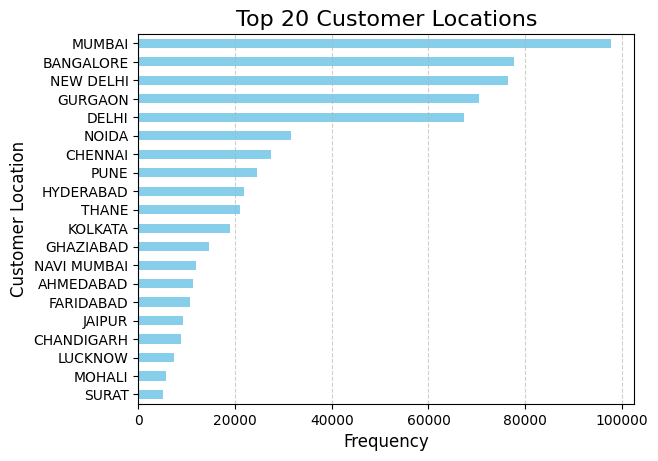

In [22]:
df1['CustLocation'].value_counts()[:20].sort_values(ascending=True).plot(kind='barh', color='skyblue')

plt.title('Top 20 Customer Locations', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Customer Location', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.show()

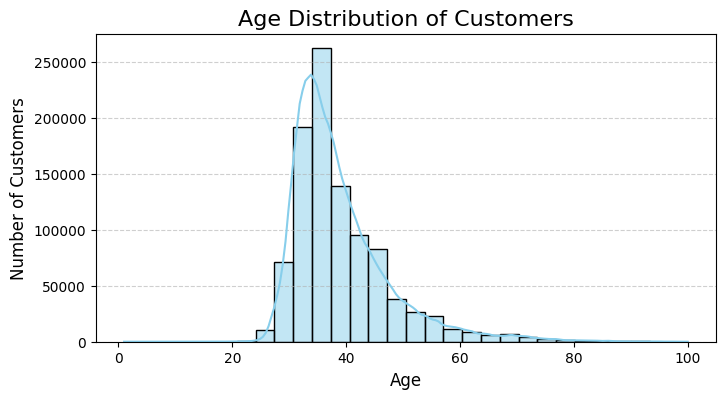

In [23]:
# Assuming df1 is your DataFrame
plt.figure(figsize=(8, 4))
sns.histplot(df1['CustomerAge'], bins=30, kde=True, color='skyblue')

# Customize the plot
plt.title('Age Distribution of Customers', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adjust font size for tick labels on both axes
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.show()

Most customers are around the age 30-40

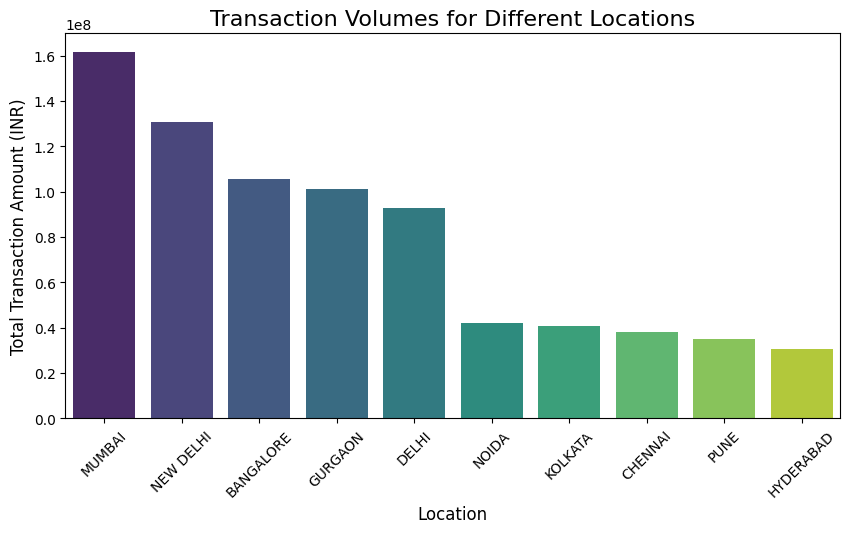

In [24]:
location_transaction_volumes = df.groupby('CustLocation')['TransactionAmount (INR)'].sum().nlargest(10).sort_values(ascending=False)

# Visualize the transaction volumes for each location using a bar plot
plt.figure(figsize=(10, 5))  # Reduced figsize
sns.barplot(x=location_transaction_volumes.index, y=location_transaction_volumes.values, palette='viridis')  
plt.title('Transaction Volumes for Different Locations', fontsize=16)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Total Transaction Amount (INR)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)  # Adjusted rotation and font size for x-axis labels

# Show the plot
plt.show()

Handling Outliers in the 'CustAccountBalance' and 'TransactionAmount (INR)' amount columns

In [25]:
# Outlier Handling using IQR method
def handle_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].apply(lambda x: upper_bound if x > upper_bound else lower_bound if x < lower_bound else x)
    return data

In [26]:
# Handling outliers for CustAccountBalance and TransactionAmount (INR) columns
df = handle_outliers_iqr(df, 'CustAccountBalance')
df = handle_outliers_iqr(df, 'TransactionAmount (INR)')

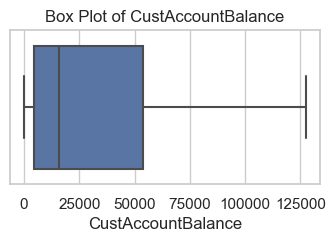

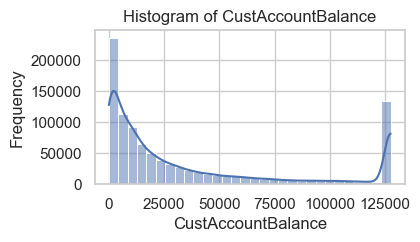

In [27]:
sns.set(style="whitegrid")
plt.figure(figsize=(4, 2))

# Box plot to visualize the distribution and identify outliers
sns.boxplot(x=df['CustAccountBalance'])

plt.title('Box Plot of CustAccountBalance')
plt.show()

# Histogram to see the distribution in more detail
plt.figure(figsize=(4, 2))
sns.histplot(df['CustAccountBalance'], bins=30, kde=True)

plt.title('Histogram of CustAccountBalance')
plt.xlabel('CustAccountBalance')
plt.ylabel('Frequency')
plt.show()

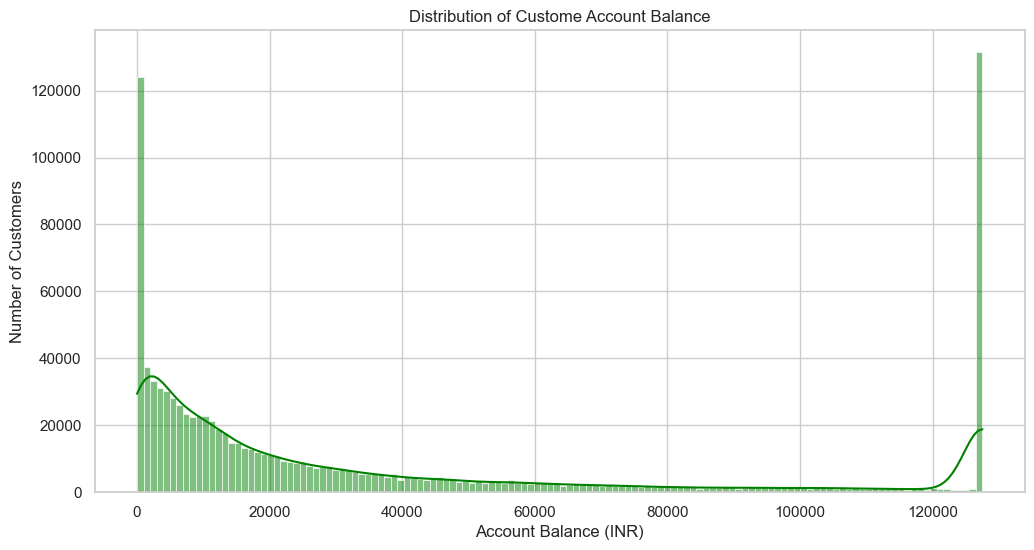

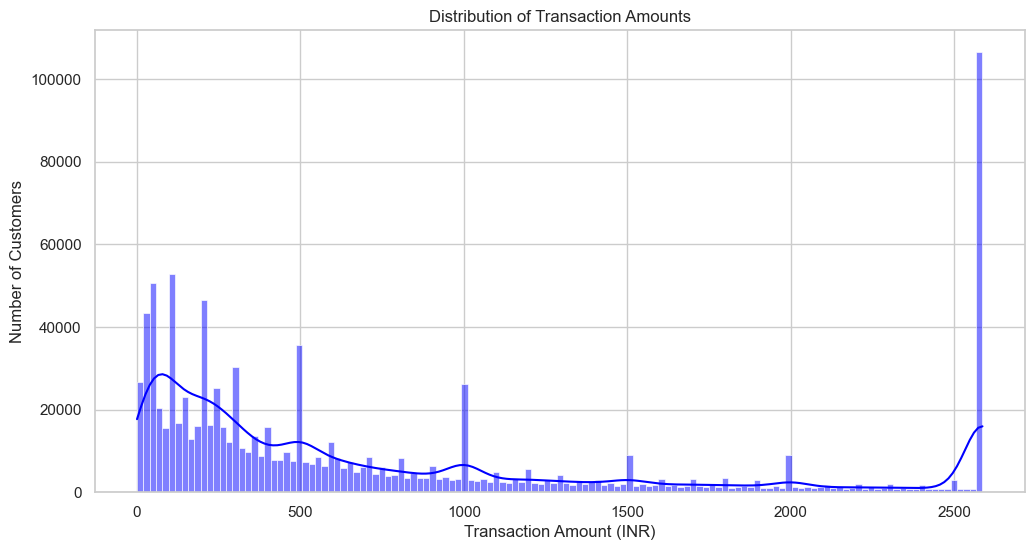

In [28]:
# Distribution of account balances (CustAccountBalance) among customers
plt.figure(figsize=(12, 6))
sns.histplot(df['CustAccountBalance'], kde=True, color='green')
plt.title('Distribution of Custome Account Balance')
plt.xlabel('Account Balance (INR)')
plt.ylabel('Number of Customers')
plt.show()

# Distribution of transaction amounts (TransactionAmount (INR)) among customers
plt.figure(figsize=(12, 6))
sns.histplot(df['TransactionAmount (INR)'], kde=True, color='blue')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount (INR)')
plt.ylabel('Number of Customers')
plt.show()

Is there any relationship between 'CustAccountBalance' and 'TransactionAmount'?

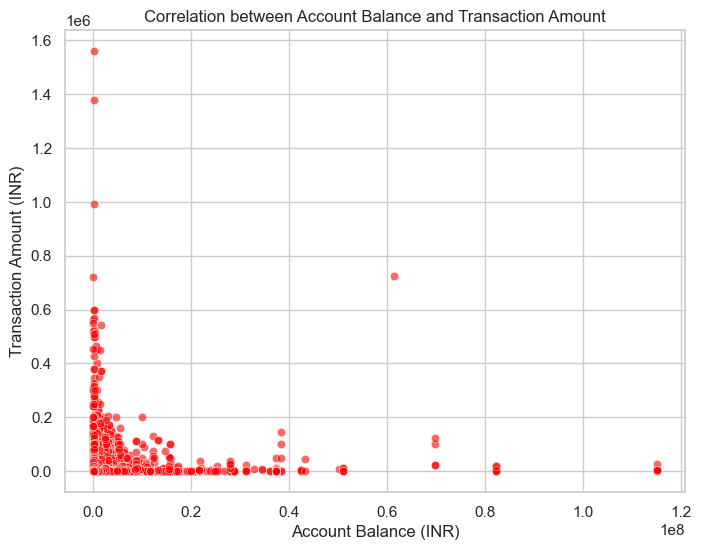

In [29]:
# Correlation between customer account balance and transaction amount
plt.figure(figsize=(8, 6))
sns.scatterplot(x='CustAccountBalance', y='TransactionAmount (INR)', data=df1, color='red', alpha=0.6)
plt.title('Correlation between Account Balance and Transaction Amount')
plt.xlabel('Account Balance (INR)')
plt.ylabel('Transaction Amount (INR)')
plt.show()

There is no linear correlation between these two variables.

In [30]:

df[["TransactionAmount (INR)", "CustAccountBalance"]].describe()

,TransactionAmount (INR),CustAccountBalance
count,985322.00,985322.00
mean,785.38,36897.40
std,837.70,43897.00
min,0.00,0.00
25%,151.00,4582.13
50%,431.00,16006.30
75%,1125.00,53759.08
max,2586.00,127524.50


## Model Building

### Data Preprocessing

In [31]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.00,30.00
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,2586.00,67.00
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.00,28.00
3,T4,C5342380,1973-09-14,F,MUMBAI,127524.50,2016-02-08,142714,2060.00,51.00
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.50,36.00


Apply label encoder for 'CustGender' and 'CustLocation' categorical variables

In [32]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
  
df['CustGender']= le.fit_transform(df['CustGender'])
df['CustLocation']= le.fit_transform(df['CustLocation'])
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge
0,T1,C5841053,1994-10-01,0,3117,17819.05,2016-02-08,143207,25.00,30.00
1,T2,C2142763,1957-04-04,1,3174,2270.69,2016-02-08,141858,2586.00,67.00
2,T3,C4417068,1996-11-26,0,4625,17874.44,2016-02-08,142712,459.00,28.00
3,T4,C5342380,1973-09-14,0,4625,127524.50,2016-02-08,142714,2060.00,51.00
4,T5,C9031234,1988-03-24,0,4965,6714.43,2016-02-08,181156,1762.50,36.00


In [33]:
#dropping columns that are not in out interest

df = df.drop(['TransactionID','CustomerID','CustomerDOB','TransactionDate','TransactionTime'],axis=1)

In [34]:
df.describe()

,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge
count,985322.00,985322.00,985322.00,985322.00,985322.00
mean,0.72,3596.41,36897.40,785.38,38.98
std,0.45,2084.15,43897.00,837.70,8.75
min,0.00,0.00,0.00,0.00,1.00
25%,0.00,1805.00,4582.13,151.00,33.00
50%,1.00,3531.00,16006.30,431.00,37.00
75%,1.00,5066.00,53759.08,1125.00,42.00
max,1.00,8163.00,127524.50,2586.00,100.00


In [35]:
df[df['TransactionAmount (INR)'] == 0].count()

CustGender                 708
CustLocation               708
CustAccountBalance         708
TransactionAmount (INR)    708
CustomerAge                708
dtype: int64

In [36]:
#dropping columns with no transcation amount
df= df.drop(df[df['TransactionAmount (INR)'] == 0].index,axis = 0)

In [37]:
df.describe()

,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge
count,984614.00,984614.00,984614.00,984614.00,984614.00
mean,0.72,3596.49,36892.09,785.94,38.98
std,0.45,2084.24,43893.85,837.73,8.75
min,0.00,0.00,0.00,0.01,1.00
25%,0.00,1805.00,4583.38,152.69,33.00
50%,1.00,3531.00,16000.52,432.89,37.00
75%,1.00,5066.00,53707.27,1127.00,42.00
max,1.00,8163.00,127524.50,2586.00,100.00


In [38]:
#Scaling the column values of interest 
from sklearn.preprocessing import StandardScaler
columns_names=['CustGender','CustLocation','CustAccountBalance','TransactionAmount (INR)','CustomerAge']
scale = StandardScaler()
df_scaled = scale.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled,columns=columns_names)
df_scaled.head()

,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge
0,-1.62,-0.23,-0.43,-0.91,-1.03
1,0.62,-0.20,-0.79,2.15,3.20
2,-1.62,0.49,-0.43,-0.39,-1.25
3,-1.62,0.49,2.06,1.52,1.37
4,-1.62,0.66,-0.69,1.17,-0.34


In [39]:
df_scaled['TransactionAmount (INR)'].max()

2.1487277410053656

## Modeling using K-Means

In [40]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [41]:
X = df_scaled[['CustomerAge', 'TransactionAmount (INR)']].values

Elbow method to determine K

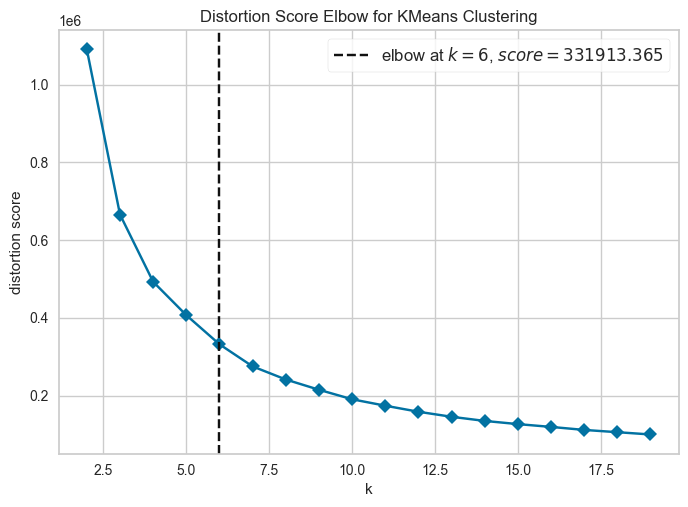

In [43]:
# Function to perform KMeans clustering and plot the elbow method
import warnings
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

def perform_elbow_method(X, k_range, title):
    model = KMeans(init='k-means++', random_state=42)
    visualizer = KElbowVisualizer(model, k=k_range, timings=False)
    visualizer.fit(X)
    plt.title(title)
    visualizer.show()

with warnings.catch_warnings():
# ignore all caught warnings
    warnings.filterwarnings("ignore")
    
perform_elbow_method(X, k_range=(2, 20), title='Elbow Method for Customer Age Clustering')

K= 6 provides the best fit for the optimal number of clusters using Elbow method.

Perform modeling and extract cluster centriods and lables

In [44]:
def perform_kmeans_clustering(X, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    cluster_centers = kmeans.cluster_centers_
    return cluster_labels, cluster_centers

x_cluster_labels, x_cluster_centers = perform_kmeans_clustering(X, num_clusters=6)

In [45]:
print("x_cluster_labels",x_cluster_labels)
print("x_cluster_centers",x_cluster_centers)

x_cluster_labels [0 1 0 ... 4 5 4]
x_cluster_centers [[-0.60777348 -0.66416666]
 [ 1.63465912  1.78157092]
 [-0.20624445  1.94962852]
 [ 3.01463531 -0.11461468]
 [-0.31421987  0.42428465]
 [ 0.66077261 -0.43930498]]


In [46]:
# Add cluster labels to the DataFrame
df_scaled['cluster_age'] = x_cluster_labels

# Add centroids to the DataFrame
df_scaled['cen_xx'] = df_scaled.cluster_age.map({i: x_cluster_centers[i][0] for i in range(6)})
df_scaled['cen_xy'] = df_scaled.cluster_age.map({i: x_cluster_centers[i][1] for i in range(6)})

df_scaled.head()

,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge,cluster_age,cen_xx,cen_xy
0,-1.62,-0.23,-0.43,-0.91,-1.03,0,-0.61,-0.66
1,0.62,-0.20,-0.79,2.15,3.20,1,1.63,1.78
2,-1.62,0.49,-0.43,-0.39,-1.25,0,-0.61,-0.66
3,-1.62,0.49,2.06,1.52,1.37,1,1.63,1.78
4,-1.62,0.66,-0.69,1.17,-0.34,4,-0.31,0.42


In [47]:
# Define colors for each cluster
colors_X = ['red', 'yellow', 'grey', 'green', 'blue', 'orange']

# Add cluster colors to the DataFrame
df_scaled['color_age_km'] = df_scaled.cluster_age.map({i: colors_X[i] for i in range(6)})
df_scaled.head()

,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge,cluster_age,cen_xx,cen_xy,color_age_km
0,-1.62,-0.23,-0.43,-0.91,-1.03,0,-0.61,-0.66,red
1,0.62,-0.20,-0.79,2.15,3.20,1,1.63,1.78,yellow
2,-1.62,0.49,-0.43,-0.39,-1.25,0,-0.61,-0.66,red
3,-1.62,0.49,2.06,1.52,1.37,1,1.63,1.78,yellow
4,-1.62,0.66,-0.69,1.17,-0.34,4,-0.31,0.42,blue


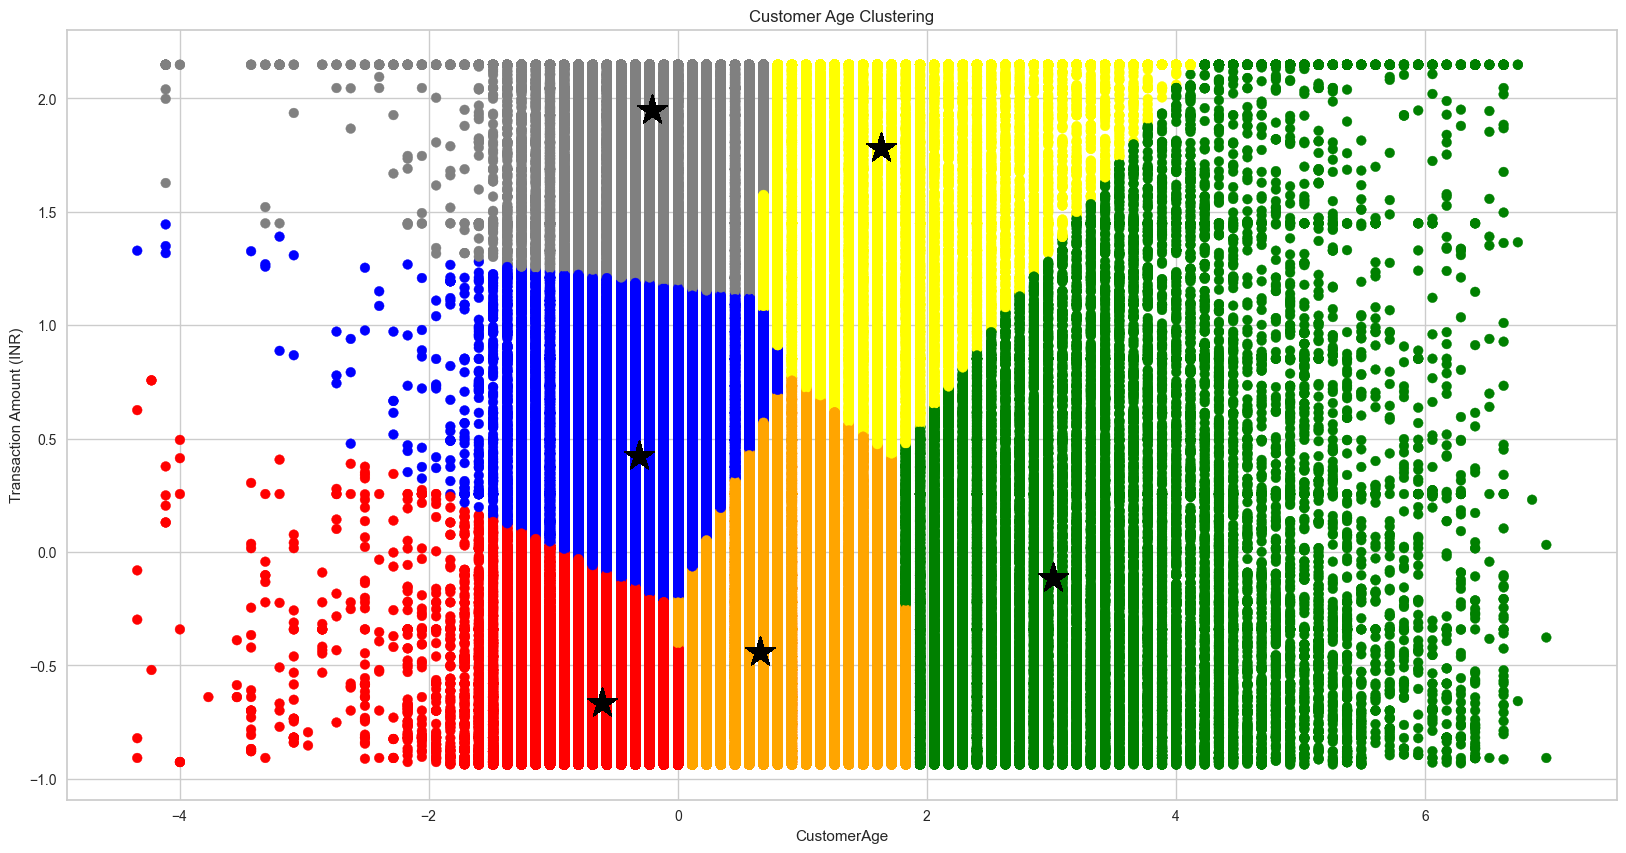

In [48]:
# Plot the scatter plot with cluster colors and centroids for 'Customer age' and 'TransactionAmount (INR)'
plt.figure(figsize=(20, 10))
plt.scatter(df_scaled['CustomerAge'], df_scaled['TransactionAmount (INR)'], c=df_scaled.color_age_km)
plt.scatter(df_scaled['cen_xx'], df_scaled['cen_xy'], marker='*', s=500, c='black')
plt.xlabel('CustomerAge')
plt.ylabel('Transaction Amount (INR)')
plt.title('Customer Age Clustering')
plt.show()

In [49]:
df_scaled['cluster_age'].value_counts()

0    441978
5    194375
4    138883
2    114234
1     57035
3     38109
Name: cluster_age, dtype: int64

## Model Evaluation:

In [ ]:
from sklearn.metrics import silhouette_score

# Silhouette Score for cluster_age
silhouette_score_age = silhouette_score(df_scaled[['TransactionAmount (INR)', 'CustomerAge']], df_scaled['cluster_age'])
print("Silhouette Score for cluster_age:", silhouette_score_age)

In [ ]:
age_cluster_avg = df_scaled.groupby('CustomerAge').mean().reset_index()

print(age_cluster_avg[['CustLocation','CustAccountBalance','TransactionAmount (INR)','CustomerAge']])